# Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
# 4 Check for missing  values if any, replace with appropriate values...
# df.isna().sum()

# df.fillna(5)
df.fillna({'price':5,'mainroad':'yes'})


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
#5 Prepare  X (independent variables) and y (dependent variable)
from sklearn.model_selection import train_test_split

df_cleaned = df.dropna(subset=['price'])  # ✅ safer and correct

x = df_cleaned.drop(columns='price')
y=df_cleaned['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(f"shapes of xtrain:{x_train.shape} and xtest:{x_test.shape}")
print(f"shapes of ytrain:{y_train.shape} and ytest:{y_test.shape}")



shapes of xtrain:(381, 12) and xtest:(164, 12)
shapes of ytrain:(381,) and ytest:(164,)


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


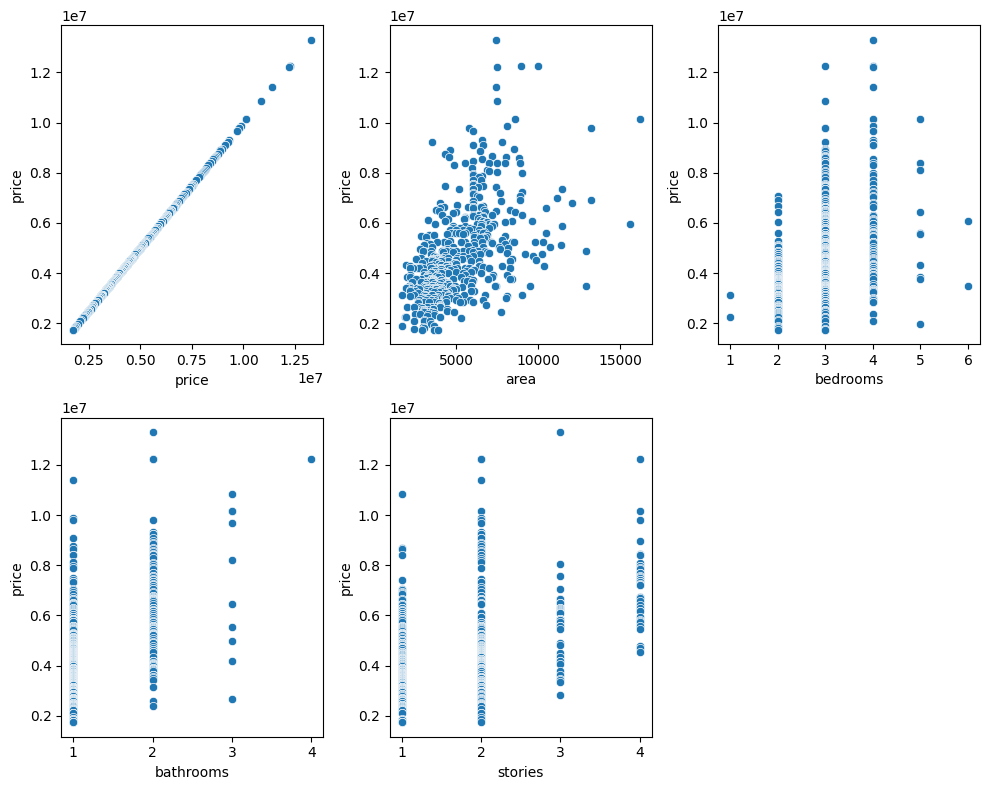

In [6]:
# 6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots

# here we have..many cols in x()
import matplotlib.pyplot as plt

fig,axes = plt.subplots(2,3,figsize=(10,8))
axes = axes.flatten()

# the graphs is only numericeal...so assing only numeric cols..
cols = x.select_dtypes(include='number').columns

print(cols)
for i,col in enumerate(df.columns[:6]):
  sns.scatterplot(data=df,x=col,y='price',ax=axes[i])

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()


In [7]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (exclude numeric ones)

cols = x.select_dtypes(include='object').columns

# Encode categorical columns in x
le = LabelEncoder()
for col in cols:
  
    x[col] = le.fit_transform(x[col].astype(str))

x[cols]  # Preview the encoded categorical columns


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,2
543,0,0,0,0,0,0,0


In [8]:
# AVOIDING  dummy variable trap
pd.get_dummies(df)

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


In [9]:
# 9 apply scaler of numerical varaibles...

# from sklearn.preprocessing import MinMaxScaler

# numcols = df.select_dtypes(include='number').columns

# scaler = MinMaxScaler()

# df[numcols]=scaler.fit_transform(df[numcols])
# df[numcols]




from sklearn.preprocessing import StandardScaler

numcols = df.select_dtypes(include='number').columns
scaler = StandardScaler()

df[numcols]= scaler.fit_transform(df[numcols])
df[numcols]

,price,area,bedrooms,bathrooms,stories,parking
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


In [15]:
##10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x = df.drop(columns='price')

x=df.select_dtypes(include='number')
y=df['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(381, 6) (164, 6)
(381,) (164,)


In [ ]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

LR.fit(x_train,y_train)



LinearRegression()

In [22]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_predict = LR.predict(x_train)

error = y_predict - y_train
error


126    2.220446e-16
363   -3.330669e-16
370   -2.220446e-16
31     8.881784e-16
113    4.440892e-16
           ...     
71     4.440892e-16
106    2.220446e-16
270    2.775558e-16
435   -3.330669e-16
102    6.661338e-16
Name: price, Length: 381, dtype: float64

Text(0, 0.5, 'errors')

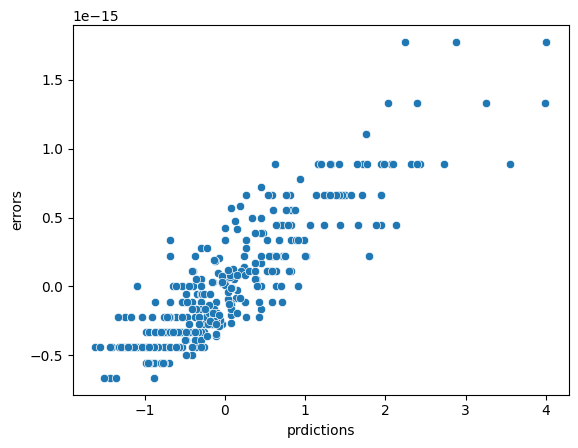

In [25]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
sns.scatterplot(x=y_predict,y=error)
plt.xlabel("prdictions")
plt.ylabel("errors")

In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
